In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import seaborn as sns; sns.set()
import scipy

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics.cluster import adjusted_rand_score
import umap

In [ ]:
df = pd.read_csv('expressions_for_astrocytoma_vs_normal.csv')
df

,Unnamed: 0,GSM2899178,GSM2899179,GSM2899180,GSM2899181,GSM2899182,GSM2899183,GSM2899184,GSM2899185,GSM2899186,...,GSM2899576,GSM2899577,GSM2899578,GSM2899579,GSM2899580,GSM2899581,GSM2899582,GSM2899583,GSM2899584,GSM2899585
0,1007_s_at,13.347616,13.037658,12.245928,13.219993,12.804088,12.985258,12.533733,13.277908,13.105506,...,11.853449,11.285719,12.330729,11.213414,11.628435,11.247015,11.290148,11.247715,11.210097,11.630479
1,1053_at,8.327712,8.599497,7.554922,8.563340,8.160554,7.905942,7.969922,8.129897,8.301041,...,7.479301,7.600943,7.943275,7.193867,7.289843,7.503353,7.245900,7.105927,7.807820,7.405586
2,117_at,7.051263,6.980851,7.306897,6.837728,6.871400,6.974473,6.711030,6.897173,7.150909,...,6.832001,6.805086,6.962876,7.000428,7.180240,6.833206,7.191639,7.182494,7.464150,7.191086
3,121_at,9.722579,9.436876,9.792243,9.705865,9.566651,9.670769,9.482651,9.667157,9.674605,...,9.688220,9.711641,9.540042,9.947258,9.862676,9.807439,9.943840,9.801934,9.534711,9.712283
4,1255_g_at,4.837194,4.909270,4.781645,4.891896,4.777848,4.818407,5.538876,4.860781,4.637299,...,5.780337,6.127051,5.441815,5.558960,5.240634,5.469605,5.140616,5.390090,5.306673,5.269253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,4.825941,4.778390,5.075450,4.834425,4.819300,4.757926,4.796171,4.939476,4.832981,...,4.984555,5.093929,4.908579,5.027612,4.954510,4.931862,4.987415,5.037435,4.957582,5.021595
54671,AFFX-ThrX-M_at,4.493257,4.301524,4.496304,4.390539,4.442079,4.449030,4.356393,4.447062,4.443358,...,4.460732,4.465731,4.401676,4.644739,4.642630,4.515149,4.507411,4.558199,4.533450,4.508794
54672,AFFX-TrpnX-3_at,4.357516,4.303363,4.391599,4.416283,4.485807,4.278195,4.282120,4.280109,4.395935,...,4.406878,4.281786,4.273944,4.437946,4.390610,4.387978,4.381671,4.265224,4.297800,4.360562
54673,AFFX-TrpnX-5_at,4.718725,4.765148,4.894760,4.803944,4.761233,4.674665,4.672074,4.548803,4.744183,...,4.695327,4.626232,4.626923,4.726368,4.671459,4.623290,4.670037,4.745835,4.769604,4.777046


In [ ]:
df.rename(columns={'Unnamed: 0':'probe_id'}, inplace=True)
df.head()

,probe_id,GSM2899178,GSM2899179,GSM2899180,GSM2899181,GSM2899182,GSM2899183,GSM2899184,GSM2899185,GSM2899186,...,GSM2899576,GSM2899577,GSM2899578,GSM2899579,GSM2899580,GSM2899581,GSM2899582,GSM2899583,GSM2899584,GSM2899585
0,1007_s_at,13.347616,13.037658,12.245928,13.219993,12.804088,12.985258,12.533733,13.277908,13.105506,...,11.853449,11.285719,12.330729,11.213414,11.628435,11.247015,11.290148,11.247715,11.210097,11.630479
1,1053_at,8.327712,8.599497,7.554922,8.563340,8.160554,7.905942,7.969922,8.129897,8.301041,...,7.479301,7.600943,7.943275,7.193867,7.289843,7.503353,7.245900,7.105927,7.807820,7.405586
2,117_at,7.051263,6.980851,7.306897,6.837728,6.871400,6.974473,6.711030,6.897173,7.150909,...,6.832001,6.805086,6.962876,7.000428,7.180240,6.833206,7.191639,7.182494,7.464150,7.191086
3,121_at,9.722579,9.436876,9.792243,9.705865,9.566651,9.670769,9.482651,9.667157,9.674605,...,9.688220,9.711641,9.540042,9.947258,9.862676,9.807439,9.943840,9.801934,9.534711,9.712283
4,1255_g_at,4.837194,4.909270,4.781645,4.891896,4.777848,4.818407,5.538876,4.860781,4.637299,...,5.780337,6.127051,5.441815,5.558960,5.240634,5.469605,5.140616,5.390090,5.306673,5.269253


In [ ]:
metadata = pd.read_csv('metadata_for_all_astrocytoma_vs_normal.csv')
metadata.head()

,Unnamed: 0,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,...,contact_country,supplementary_file,supplementary_file.1,data_row_count,assay name:ch1,disease:ch1,extract name:ch1,provider:ch1,tissue:ch1,tumor grade:ch1
0,GSM2899178,900_00_1961,GSM2899178,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,00715851_T,astrocytoma,00715851_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 2
1,GSM2899179,900_00_5308,GSM2899179,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03421899_T,astrocytoma,03421899_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 3
2,GSM2899180,900_00_5382,GSM2899180,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03437595_T,astrocytoma,03437595_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 2
3,GSM2899181,900_00_5385,GSM2899181,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03441740_T,astrocytoma,03441740_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 3
4,GSM2899182,900_00_5459,GSM2899182,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03461078_T,astrocytoma,03461078_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 3


In [ ]:
metadata = metadata[["Unnamed: 0", "disease:ch1"]]
metadata

,Unnamed: 0,disease:ch1
0,GSM2899178,astrocytoma
1,GSM2899179,astrocytoma
2,GSM2899180,astrocytoma
3,GSM2899181,astrocytoma
4,GSM2899182,astrocytoma
...,...,...
171,GSM2899581,normal
172,GSM2899582,normal
173,GSM2899583,normal
174,GSM2899584,normal


In [ ]:
metadata.rename(columns={'Unnamed: 0':'sample_name'}, inplace=True)

In [ ]:
metadata = metadata.set_index('sample_name', drop=False).rename_axis(None)
metadata

,sample_name,disease:ch1
GSM2899178,GSM2899178,astrocytoma
GSM2899179,GSM2899179,astrocytoma
GSM2899180,GSM2899180,astrocytoma
GSM2899181,GSM2899181,astrocytoma
GSM2899182,GSM2899182,astrocytoma
...,...,...
GSM2899581,GSM2899581,normal
GSM2899582,GSM2899582,normal
GSM2899583,GSM2899583,normal
GSM2899584,GSM2899584,normal


In [ ]:
metadata = metadata.iloc[: , 1:]
metadata

,disease:ch1
GSM2899178,astrocytoma
GSM2899179,astrocytoma
GSM2899180,astrocytoma
GSM2899181,astrocytoma
GSM2899182,astrocytoma
...,...
GSM2899581,normal
GSM2899582,normal
GSM2899583,normal
GSM2899584,normal


In [ ]:
df_transposed = df.T
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,54665,54666,54667,54668,54669,54670,54671,54672,54673,54674
probe_id,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2899178,13.347616,8.327712,7.051263,9.722579,4.837194,9.426414,7.215003,6.50568,5.2819,5.941298,...,11.70159,11.40982,13.36162,13.27596,5.171875,4.825941,4.493257,4.357516,4.718725,4.890663
GSM2899179,13.037658,8.599497,6.980851,9.436876,4.90927,8.63874,6.961799,6.756812,5.431709,5.441469,...,11.42456,11.15898,13.29751,13.0892,5.073433,4.77839,4.301524,4.303363,4.765148,5.002239
GSM2899180,12.245928,7.554922,7.306897,9.792243,4.781645,7.76012,7.112797,6.47399,4.995067,6.455514,...,11.7036,11.47929,13.55896,13.36235,5.484479,5.07545,4.496304,4.391599,4.89476,4.872487
GSM2899181,13.219993,8.56334,6.837728,9.705865,4.891896,8.391774,6.944318,6.712933,4.776009,5.2742,...,11.61575,11.39556,13.52602,13.2783,5.19685,4.834425,4.390539,4.416283,4.803944,4.953777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899581,11.247015,7.503353,6.833206,9.807439,5.469605,7.873396,7.675159,6.443557,5.361584,5.760053,...,12.37909,12.14099,14.1258,14.13966,5.445018,4.931862,4.515149,4.387978,4.62329,4.806966
GSM2899582,11.290148,7.2459,7.191639,9.94384,5.140616,7.908947,7.41499,6.337036,5.32281,5.610738,...,11.71462,11.57974,13.85608,13.77152,5.468999,4.987415,4.507411,4.381671,4.670037,4.95773
GSM2899583,11.247715,7.105927,7.182494,9.801934,5.39009,7.632144,7.507505,6.421068,5.286136,5.881272,...,11.60908,11.61682,13.71876,13.84411,5.436466,5.037435,4.558199,4.265224,4.745835,4.820173
GSM2899584,11.210097,7.80782,7.46415,9.534711,5.306673,7.882128,7.289644,6.23607,5.403705,5.425312,...,11.51384,11.28392,13.7547,13.57586,5.42399,4.957582,4.53345,4.2978,4.769604,4.871576


In [ ]:
df_transposed = df_transposed.rename(columns=df_transposed.iloc[0])
df_transposed

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
probe_id,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2899178,13.347616,8.327712,7.051263,9.722579,4.837194,9.426414,7.215003,6.50568,5.2819,5.941298,...,11.70159,11.40982,13.36162,13.27596,5.171875,4.825941,4.493257,4.357516,4.718725,4.890663
GSM2899179,13.037658,8.599497,6.980851,9.436876,4.90927,8.63874,6.961799,6.756812,5.431709,5.441469,...,11.42456,11.15898,13.29751,13.0892,5.073433,4.77839,4.301524,4.303363,4.765148,5.002239
GSM2899180,12.245928,7.554922,7.306897,9.792243,4.781645,7.76012,7.112797,6.47399,4.995067,6.455514,...,11.7036,11.47929,13.55896,13.36235,5.484479,5.07545,4.496304,4.391599,4.89476,4.872487
GSM2899181,13.219993,8.56334,6.837728,9.705865,4.891896,8.391774,6.944318,6.712933,4.776009,5.2742,...,11.61575,11.39556,13.52602,13.2783,5.19685,4.834425,4.390539,4.416283,4.803944,4.953777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899581,11.247015,7.503353,6.833206,9.807439,5.469605,7.873396,7.675159,6.443557,5.361584,5.760053,...,12.37909,12.14099,14.1258,14.13966,5.445018,4.931862,4.515149,4.387978,4.62329,4.806966
GSM2899582,11.290148,7.2459,7.191639,9.94384,5.140616,7.908947,7.41499,6.337036,5.32281,5.610738,...,11.71462,11.57974,13.85608,13.77152,5.468999,4.987415,4.507411,4.381671,4.670037,4.95773
GSM2899583,11.247715,7.105927,7.182494,9.801934,5.39009,7.632144,7.507505,6.421068,5.286136,5.881272,...,11.60908,11.61682,13.71876,13.84411,5.436466,5.037435,4.558199,4.265224,4.745835,4.820173
GSM2899584,11.210097,7.80782,7.46415,9.534711,5.306673,7.882128,7.289644,6.23607,5.403705,5.425312,...,11.51384,11.28392,13.7547,13.57586,5.42399,4.957582,4.53345,4.2978,4.769604,4.871576


In [ ]:
df_transposed.drop(index=df_transposed.index[0], 
        axis=0, 
        inplace=True)
df_transposed

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2899178,13.347616,8.327712,7.051263,9.722579,4.837194,9.426414,7.215003,6.50568,5.2819,5.941298,...,11.70159,11.40982,13.36162,13.27596,5.171875,4.825941,4.493257,4.357516,4.718725,4.890663
GSM2899179,13.037658,8.599497,6.980851,9.436876,4.90927,8.63874,6.961799,6.756812,5.431709,5.441469,...,11.42456,11.15898,13.29751,13.0892,5.073433,4.77839,4.301524,4.303363,4.765148,5.002239
GSM2899180,12.245928,7.554922,7.306897,9.792243,4.781645,7.76012,7.112797,6.47399,4.995067,6.455514,...,11.7036,11.47929,13.55896,13.36235,5.484479,5.07545,4.496304,4.391599,4.89476,4.872487
GSM2899181,13.219993,8.56334,6.837728,9.705865,4.891896,8.391774,6.944318,6.712933,4.776009,5.2742,...,11.61575,11.39556,13.52602,13.2783,5.19685,4.834425,4.390539,4.416283,4.803944,4.953777
GSM2899182,12.804088,8.160554,6.8714,9.566651,4.777848,8.887939,6.996213,6.03443,4.973105,6.285567,...,11.62069,11.38281,13.25022,13.18223,5.335511,4.8193,4.442079,4.485807,4.761233,4.797725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899581,11.247015,7.503353,6.833206,9.807439,5.469605,7.873396,7.675159,6.443557,5.361584,5.760053,...,12.37909,12.14099,14.1258,14.13966,5.445018,4.931862,4.515149,4.387978,4.62329,4.806966
GSM2899582,11.290148,7.2459,7.191639,9.94384,5.140616,7.908947,7.41499,6.337036,5.32281,5.610738,...,11.71462,11.57974,13.85608,13.77152,5.468999,4.987415,4.507411,4.381671,4.670037,4.95773
GSM2899583,11.247715,7.105927,7.182494,9.801934,5.39009,7.632144,7.507505,6.421068,5.286136,5.881272,...,11.60908,11.61682,13.71876,13.84411,5.436466,5.037435,4.558199,4.265224,4.745835,4.820173
GSM2899584,11.210097,7.80782,7.46415,9.534711,5.306673,7.882128,7.289644,6.23607,5.403705,5.425312,...,11.51384,11.28392,13.7547,13.57586,5.42399,4.957582,4.53345,4.2978,4.769604,4.871576


In [ ]:
frames = [metadata, df_transposed]

In [ ]:
result = pd.concat(frames, axis=1)
result

,disease:ch1,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2899178,astrocytoma,13.347616,8.327712,7.051263,9.722579,4.837194,9.426414,7.215003,6.50568,5.2819,...,11.70159,11.40982,13.36162,13.27596,5.171875,4.825941,4.493257,4.357516,4.718725,4.890663
GSM2899179,astrocytoma,13.037658,8.599497,6.980851,9.436876,4.90927,8.63874,6.961799,6.756812,5.431709,...,11.42456,11.15898,13.29751,13.0892,5.073433,4.77839,4.301524,4.303363,4.765148,5.002239
GSM2899180,astrocytoma,12.245928,7.554922,7.306897,9.792243,4.781645,7.76012,7.112797,6.47399,4.995067,...,11.7036,11.47929,13.55896,13.36235,5.484479,5.07545,4.496304,4.391599,4.89476,4.872487
GSM2899181,astrocytoma,13.219993,8.56334,6.837728,9.705865,4.891896,8.391774,6.944318,6.712933,4.776009,...,11.61575,11.39556,13.52602,13.2783,5.19685,4.834425,4.390539,4.416283,4.803944,4.953777
GSM2899182,astrocytoma,12.804088,8.160554,6.8714,9.566651,4.777848,8.887939,6.996213,6.03443,4.973105,...,11.62069,11.38281,13.25022,13.18223,5.335511,4.8193,4.442079,4.485807,4.761233,4.797725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899581,normal,11.247015,7.503353,6.833206,9.807439,5.469605,7.873396,7.675159,6.443557,5.361584,...,12.37909,12.14099,14.1258,14.13966,5.445018,4.931862,4.515149,4.387978,4.62329,4.806966
GSM2899582,normal,11.290148,7.2459,7.191639,9.94384,5.140616,7.908947,7.41499,6.337036,5.32281,...,11.71462,11.57974,13.85608,13.77152,5.468999,4.987415,4.507411,4.381671,4.670037,4.95773
GSM2899583,normal,11.247715,7.105927,7.182494,9.801934,5.39009,7.632144,7.507505,6.421068,5.286136,...,11.60908,11.61682,13.71876,13.84411,5.436466,5.037435,4.558199,4.265224,4.745835,4.820173
GSM2899584,normal,11.210097,7.80782,7.46415,9.534711,5.306673,7.882128,7.289644,6.23607,5.403705,...,11.51384,11.28392,13.7547,13.57586,5.42399,4.957582,4.53345,4.2978,4.769604,4.871576


In [ ]:
df = result
df

,disease:ch1,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2899178,astrocytoma,13.347616,8.327712,7.051263,9.722579,4.837194,9.426414,7.215003,6.50568,5.2819,...,11.70159,11.40982,13.36162,13.27596,5.171875,4.825941,4.493257,4.357516,4.718725,4.890663
GSM2899179,astrocytoma,13.037658,8.599497,6.980851,9.436876,4.90927,8.63874,6.961799,6.756812,5.431709,...,11.42456,11.15898,13.29751,13.0892,5.073433,4.77839,4.301524,4.303363,4.765148,5.002239
GSM2899180,astrocytoma,12.245928,7.554922,7.306897,9.792243,4.781645,7.76012,7.112797,6.47399,4.995067,...,11.7036,11.47929,13.55896,13.36235,5.484479,5.07545,4.496304,4.391599,4.89476,4.872487
GSM2899181,astrocytoma,13.219993,8.56334,6.837728,9.705865,4.891896,8.391774,6.944318,6.712933,4.776009,...,11.61575,11.39556,13.52602,13.2783,5.19685,4.834425,4.390539,4.416283,4.803944,4.953777
GSM2899182,astrocytoma,12.804088,8.160554,6.8714,9.566651,4.777848,8.887939,6.996213,6.03443,4.973105,...,11.62069,11.38281,13.25022,13.18223,5.335511,4.8193,4.442079,4.485807,4.761233,4.797725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899581,normal,11.247015,7.503353,6.833206,9.807439,5.469605,7.873396,7.675159,6.443557,5.361584,...,12.37909,12.14099,14.1258,14.13966,5.445018,4.931862,4.515149,4.387978,4.62329,4.806966
GSM2899582,normal,11.290148,7.2459,7.191639,9.94384,5.140616,7.908947,7.41499,6.337036,5.32281,...,11.71462,11.57974,13.85608,13.77152,5.468999,4.987415,4.507411,4.381671,4.670037,4.95773
GSM2899583,normal,11.247715,7.105927,7.182494,9.801934,5.39009,7.632144,7.507505,6.421068,5.286136,...,11.60908,11.61682,13.71876,13.84411,5.436466,5.037435,4.558199,4.265224,4.745835,4.820173
GSM2899584,normal,11.210097,7.80782,7.46415,9.534711,5.306673,7.882128,7.289644,6.23607,5.403705,...,11.51384,11.28392,13.7547,13.57586,5.42399,4.957582,4.53345,4.2978,4.769604,4.871576


In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in the brain cancer data set')

There are 176 rows and 54676 columns in the brain cancer data set


In [ ]:
df.isnull().sum()

disease:ch1        0
1007_s_at          0
1053_at            0
117_at             0
121_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54676, dtype: int64

In [ ]:
# check for label distribution
label_count = df['disease:ch1'].value_counts()
label_count

astrocytoma    148
normal          28
Name: disease:ch1, dtype: int64

In [ ]:
# assign labels to variable y
y = df['disease:ch1']
y

GSM2899178    astrocytoma
GSM2899179    astrocytoma
GSM2899180    astrocytoma
GSM2899181    astrocytoma
GSM2899182    astrocytoma
                 ...     
GSM2899581         normal
GSM2899582         normal
GSM2899583         normal
GSM2899584         normal
GSM2899585         normal
Name: disease:ch1, Length: 176, dtype: object

In [ ]:
# select feature data for clustering
data = df.iloc[:,1:].values
data

array([[13.3476159167798, 8.32771162684087, 7.05126271473405, ...,
        4.357516, 4.718725, 4.890663],
       [13.0376578953624, 8.59949692987476, 6.98085079857407, ...,
        4.303363, 4.765148, 5.002239],
       [12.2459275303019, 7.55492234326835, 7.30689719942202, ...,
        4.391599, 4.89476, 4.872487],
       ...,
       [11.2477149706613, 7.1059271077475, 7.18249434459756, ...,
        4.265224, 4.745835, 4.820173],
       [11.210097481342, 7.80781983307784, 7.46414953095619, ..., 4.2978,
        4.769604, 4.871576],
       [11.6304785413221, 7.40558606406517, 7.19108623693743, ...,
        4.360562, 4.777046, 5.176666]], dtype=object)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(data)

In [ ]:
scaled_data

array([[ 1.41405101,  0.77099416, -0.39968834, ...,  0.1731031 ,
        -0.04437687, -0.1471846 ],
       [ 0.91137045,  1.32410871, -0.54324686, ..., -0.75352271,
         0.54040513,  0.9346995 ],
       [-0.37263394, -0.80172146,  0.12150907, ...,  0.75630601,
         2.17310366, -0.32342614],
       ...,
       [-1.99150492, -1.71547873, -0.13212825, ..., -1.40612887,
         0.29712282, -0.83068294],
       [-2.05251183, -0.2870458 ,  0.44212117, ..., -0.84871262,
         0.59653654, -0.33225955],
       [-1.37075052, -1.10563808, -0.11461077, ...,  0.22522398,
         0.69028205,  2.62601124]])

In [ ]:
### k-Means Clustering
# Calculate the cluster errors for clusters from 1 to 15
cluster_range = range( 1, 20 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 10 )
  clusters.fit(scaled_data)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,9.622800e+06
1,2,8.516236e+06
2,3,7.939521e+06
3,4,7.627452e+06
4,5,7.312081e+06
5,6,7.144639e+06
6,7,6.840142e+06
7,8,6.726808e+06
8,9,6.642885e+06
9,10,6.482395e+06


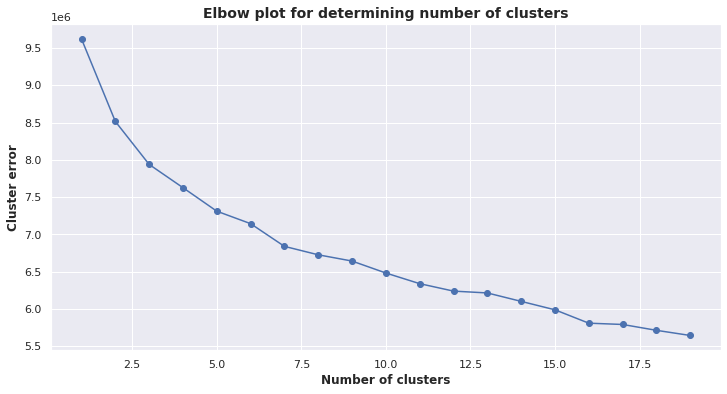

In [ ]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Cluster error', fontsize=12, fontweight='bold')
plt.title('Elbow plot for determining number of clusters', fontsize=14, fontweight='bold')
plt.savefig('elbowplot.png')

In [ ]:
# instantiate KMeans object
km = KMeans(n_clusters=3, random_state=0)

In [ ]:
# predict the cluster labels
labels = km.fit_predict(scaled_data)

In [ ]:
km.cluster_centers_.shape

(3, 54675)

In [ ]:
centroids = km.cluster_centers_
print(centroids)

[[ 0.22877222 -0.35251514 -0.02005003 ...  0.28657233  0.16607858
   0.13712674]
 [ 0.54653396  0.64101844  0.1216104  ... -0.18744513 -0.0668397
  -0.14326063]
 [-1.40540497 -0.76367735 -0.21160925 ... -0.03816144 -0.10465358
   0.08753415]]


In [ ]:
# print cluster labels
print(labels)

[1 1 2 1 1 1 2 1 1 2 1 1 1 1 0 1 2 2 2 0 0 0 1 1 1 2 1 1 1 1 0 1 2 0 1 1 2
 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 2 0 1 1 1 0 0 2 0 1 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 2 1 0 0 0 1 0 0 1 0
 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(km.labels_ , columns = list(['label']))

df_labels['label'] = df_labels['label'].astype('category')
df_labels['sample_name'] = df.index
df_labels = df_labels.set_index('sample_name', drop=False).rename_axis(None)
df_labels = df_labels.iloc[: , :-1]
df_labels

,label
GSM2899178,1
GSM2899179,1
GSM2899180,2
GSM2899181,1
GSM2899182,1
...,...
GSM2899581,2
GSM2899582,2
GSM2899583,2
GSM2899584,2


In [ ]:
# Joining the label dataframe with the original data frame. 
df_labeled = df.join(df_labels)
df_labeled.head()

,disease:ch1,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,label
GSM2899178,astrocytoma,13.347616,8.327712,7.051263,9.722579,4.837194,9.426414,7.215003,6.50568,5.2819,...,11.40982,13.36162,13.27596,5.171875,4.825941,4.493257,4.357516,4.718725,4.890663,1
GSM2899179,astrocytoma,13.037658,8.599497,6.980851,9.436876,4.90927,8.63874,6.961799,6.756812,5.431709,...,11.15898,13.29751,13.0892,5.073433,4.77839,4.301524,4.303363,4.765148,5.002239,1
GSM2899180,astrocytoma,12.245928,7.554922,7.306897,9.792243,4.781645,7.76012,7.112797,6.47399,4.995067,...,11.47929,13.55896,13.36235,5.484479,5.07545,4.496304,4.391599,4.89476,4.872487,2
GSM2899181,astrocytoma,13.219993,8.56334,6.837728,9.705865,4.891896,8.391774,6.944318,6.712933,4.776009,...,11.39556,13.52602,13.2783,5.19685,4.834425,4.390539,4.416283,4.803944,4.953777,1
GSM2899182,astrocytoma,12.804088,8.160554,6.8714,9.566651,4.777848,8.887939,6.996213,6.03443,4.973105,...,11.38281,13.25022,13.18223,5.335511,4.8193,4.442079,4.485807,4.761233,4.797725,1


In [ ]:
df_labeled['label'].value_counts()

1    79
0    57
2    40
Name: label, dtype: int64

In [ ]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 7932461.15


In [ ]:
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [ ]:
permutation = find_permutation(3, y, km.labels_)
print(permutation)

['astrocytoma', 'astrocytoma', 'normal']


In [ ]:
new_labels = [ permutation[label] for label in km.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.9318181818181818


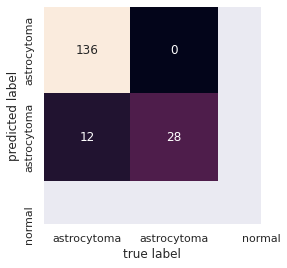

In [ ]:
# plot confusion matrix
mat = confusion_matrix(y, new_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=permutation,
            yticklabels=permutation)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.savefig('confustion_matrix_1')

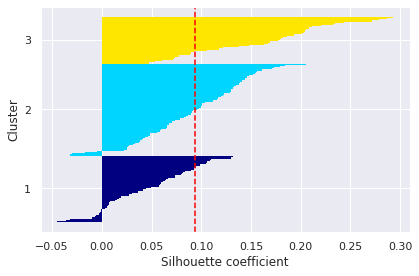

In [ ]:
# create silhoutte plot
cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaled_data,
                                      labels,
                                      metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[labels == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(i) / n_clusters)
     plt.barh(range(y_ax_lower, y_ax_upper),
              c_silhouette_vals,
              height=1.0,
              edgecolor='none',
              color=color)
     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
             color="red",
             linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.show()
plt.savefig('silhoutte_plot_1.png')

In [ ]:
kmeansSilhouette_Score = metrics.silhouette_score(data, labels, metric='euclidean')

In [ ]:
print(kmeansSilhouette_Score)

0.10735581165881376


In [ ]:
rand_index = adjusted_rand_score(labels_true = y, labels_pred = labels)
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.26


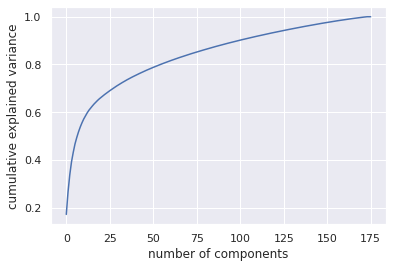

In [ ]:
# In order to find the number of dimensions explaining most of the variety in the data, plot cumulative explained variance
pca_plot = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca_plot.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
tsne = TSNE(random_state=0)

In [ ]:
tsne_result = tsne.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
xi = tsne_result[:, 0]
yi = tsne_result[:, 1]

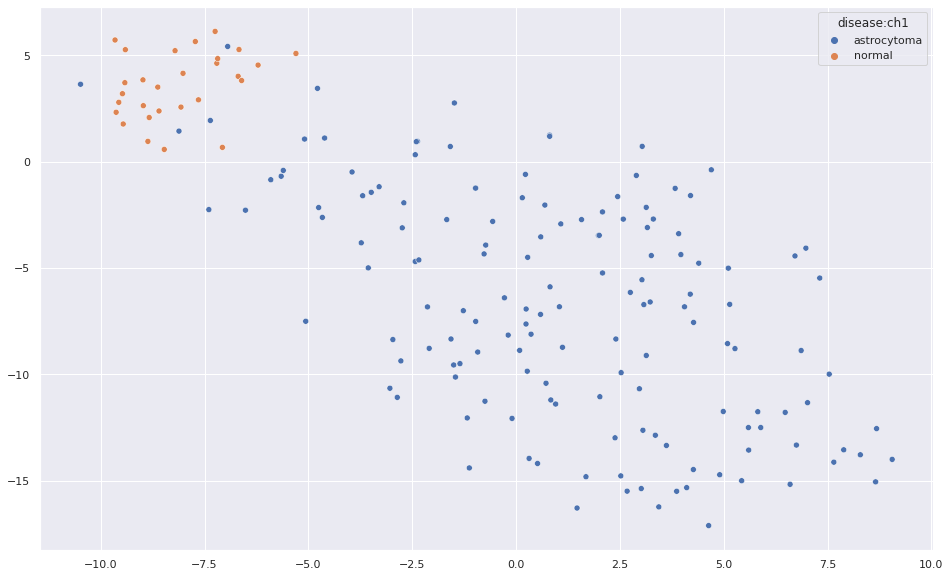

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=xi, y=yi,
    hue=y,
    legend="full",
    alpha=1
)
plt.savefig('t-SNE_plot.png')

In [ ]:
tsne_scaled = TSNE(random_state=0)

In [ ]:
tsne_result_scaled = tsne.fit_transform(scaled_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
xi_scaled = tsne_result_scaled[:, 0]
yi_scaled = tsne_result_scaled[:, 1]

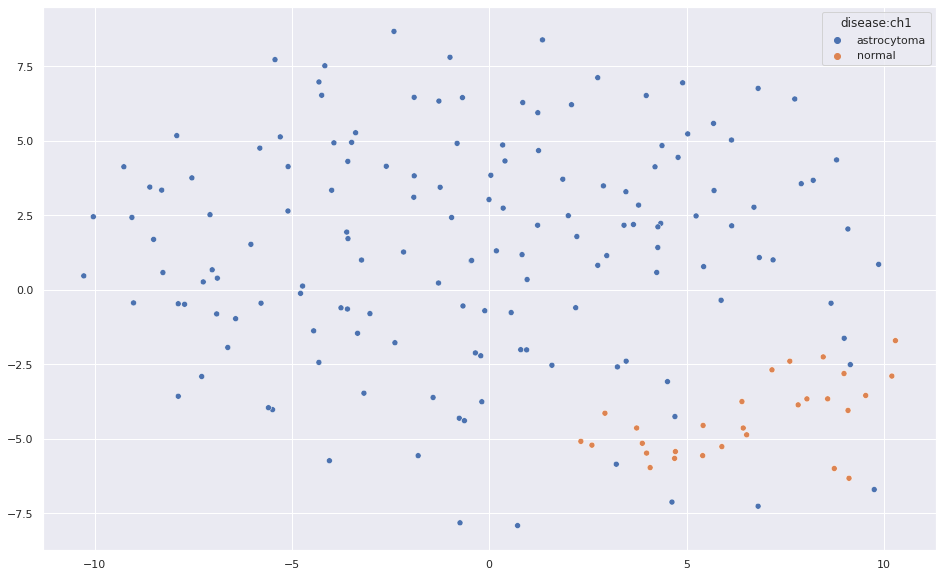

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=xi_scaled, y=yi_scaled,
    hue=y,
    legend="full",
    alpha=1
)

In [ ]:
km_tsne = KMeans(n_clusters = 3, random_state=0)

In [ ]:
# predict the cluster labels
labels_tsne = km_tsne.fit_predict(tsne_result)

In [ ]:
labels_tsne.size

176

In [ ]:
labels_tsne

array([0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels_tsne = pd.DataFrame(km_tsne.labels_ , columns = list(['label']))
df_labels_tsne['label'] = df_labels_tsne['label'].astype('category')

df_labels_tsne['sample_name'] = df.index
df_labels_tsne = df_labels_tsne.set_index('sample_name', drop=False).rename_axis(None)
df_labels_tsne = df_labels_tsne.iloc[: , :-1]
df_labels_tsne.head()

,label
GSM2899178,0
GSM2899179,2
GSM2899180,1
GSM2899181,2
GSM2899182,0


In [ ]:
df_labels_tsne['label'].value_counts()

0    73
2    52
1    51
Name: label, dtype: int64

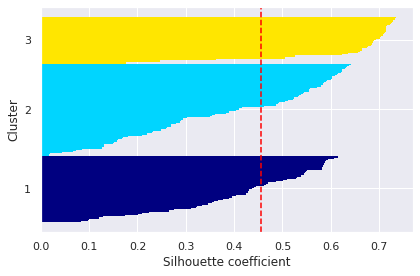

In [ ]:
# silhouette plot
cluster_labels = np.unique(labels_tsne)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(tsne_result,
                                      labels_tsne,
                                      metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[labels == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(i) / n_clusters)
     plt.barh(range(y_ax_lower, y_ax_upper),
              c_silhouette_vals,
              height=1.0,
              edgecolor='none',
              color=color)
     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
             color="red",
             linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.show()
plt.savefig('silhoutte_plot_2.png')

In [ ]:
kmeansSilhouette_Score = metrics.silhouette_score(tsne_result, labels_tsne, metric='euclidean')
kmeansSilhouette_Score

0.4562736

In [ ]:
permutation = find_permutation(3, y, km_tsne.labels_)
print(permutation)

['astrocytoma', 'normal', 'astrocytoma']


In [ ]:
new_labels = [ permutation[label] for label in km_tsne.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.8693181818181818


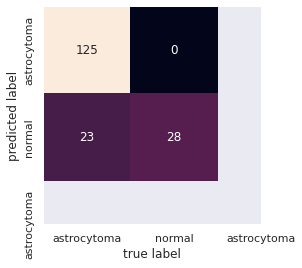

In [ ]:
# plot confusion matrix
mat = confusion_matrix(y, new_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=permutation,
            yticklabels=permutation)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.savefig('confustion_matrix_1')

In [ ]:
rand_index = adjusted_rand_score(labels_true = y, labels_pred = labels_tsne)
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.17


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 31.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=bb472c3fb36b4a70cc69bd1659829e836cc19561d66733aa7c2eaace0be2fb07
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=4c49e3d1daff4bbdd01affd9c2b9e2faf2be0e154271e66c74a1dbe6257e31e9
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
from umap import UMAP

In [ ]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(data)

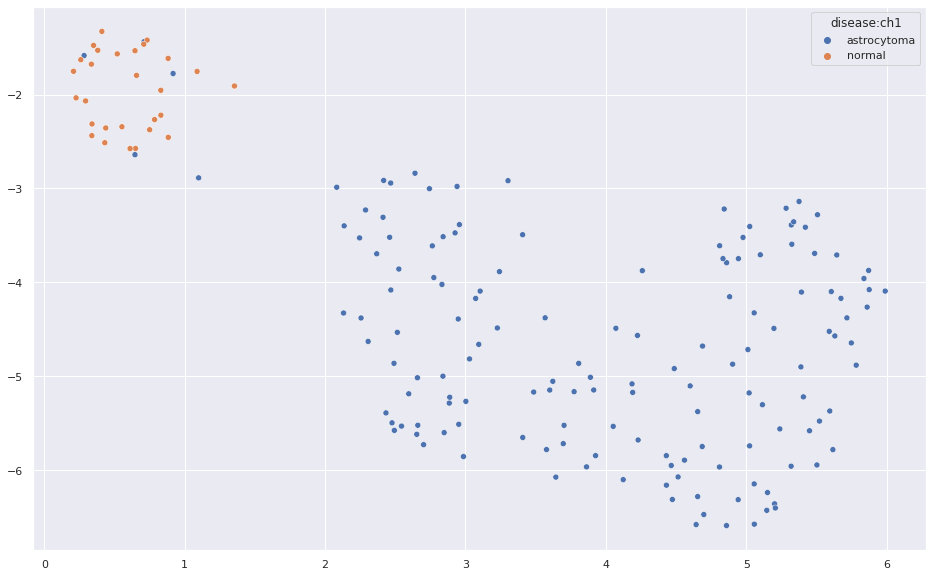

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=clusterable_embedding[:, 0], y=clusterable_embedding[:, 1],
    hue=y,
    legend="full",
    alpha=1
)
plt.savefig('UMAP_plot.png')

In [ ]:
km_umap = KMeans(n_clusters = 3)

In [ ]:
# predict the cluster labels
labels_umap = km_umap.fit_predict(clusterable_embedding)

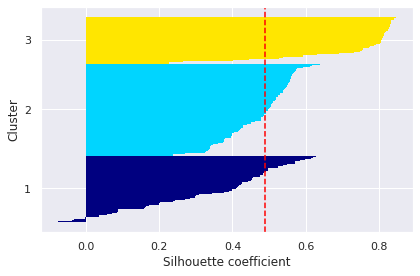

In [ ]:
# silhouette plot
cluster_labels = np.unique(labels_umap)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(clusterable_embedding,
                                      labels_umap,
                                      metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[labels == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(i) / n_clusters)
     plt.barh(range(y_ax_lower, y_ax_upper),
              c_silhouette_vals,
              height=1.0,
              edgecolor='none',
              color=color)
     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
             color="red",
             linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.show()
plt.savefig('silhoutte_plot_3.png')

In [ ]:
kmeansSilhouette_Score = metrics.silhouette_score(clusterable_embedding, labels_umap, metric='euclidean')
kmeansSilhouette_Score

0.49004027

In [ ]:
permutation = find_permutation(3, y, km_umap.labels_)
print(permutation)

['astrocytoma', 'normal', 'astrocytoma']


In [ ]:
km_umap.labels_

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
new_labels = [ permutation[label] for label in km_umap.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.9715909090909091


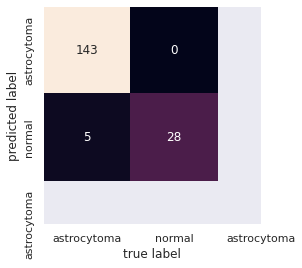

In [ ]:
# plot confusion matrix
mat = confusion_matrix(y, new_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=permutation,
            yticklabels=permutation)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.savefig('confustion_matrix_3')

In [ ]:
rand_index = adjusted_rand_score(labels_true = y, labels_pred = labels_umap)
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.33
